<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#Importing-Data-Sets">Importing Data </a></li>
    <li><a href="#Data-Wrangling">Data Wrangling</a> </li>
    <li><a href="#Exploratory-Data-Analysis">Exploratory Data Analysis</a></li>
    <li><a href="#Model-Development">Model Development</a></li>
    <li><a href="#Model-Evaluation-and-Refinement">Model Evaluation and Refinement</a></li>
</a></li>


<hr>


## **Import the required libraries**


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import seaborn as sns

from scipy.stats import boxcox
from sklearn.cluster import KMeans
from geopy.distance import geodesic
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline

%matplotlib inline

from functions import *

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# Automatically Reload Changes 
%load_ext autoreload
%autoreload 2

# Importing Data Sets


Download the dataset by running the cell below.


In [7]:
# !pip install geopy
# !pip install gdown

import gdown

# Use the Google Drive file ID in the URL (extract it from the shareable link)
file_id = '13_7FNnO88zWwAmJdg6lejZAwdlHJiAW6'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'kc_house_data.csv'

# Download the file
gdown.download(url, output, quiet=False)

df = pd.read_csv(output, index_col='id')
df.head()


Downloading...
From: https://drive.google.com/uc?id=13_7FNnO88zWwAmJdg6lejZAwdlHJiAW6
To: /Users/sam/JDA_Coursera_Python/Course7_Data_Analysis/project/kc_house_data.csv
100%|██████████| 2.52M/2.52M [00:00<00:00, 12.5MB/s]


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 1

In [9]:
df["date"] = pd.to_datetime(df["date"], format='%Y%m%dT%H%M%S')

# Data Wrangling


In [11]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


check missing values in each column


In [13]:
missing_values_table(df)

Number of columns of this dataframe is 20.
Columns with missing values are 0.


,Missing Values,% of Total Values


There are no missing values.

# Exploratory Data Analysis


In [16]:
summarize_dataframe(df)


Data Total Number of Each Type:
 int64             14
float64            5
datetime64[ns]     1
Name: count, dtype: int64

Float Types Count:
 price        4028
bathrooms      30
floors          6
lat          5034
long          752
dtype: int64

Integer Types Count:
 bedrooms           13
sqft_living      1038
sqft_lot         9782
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
sqft_living15     777
sqft_lot15       8689
dtype: int64

Object Types Count:
 Series([], dtype: float64)

Data Dimension: (21613, 20)


In [17]:

print("\nBathroom", df['bathrooms'].unique())
print("\nFloor:", df['floors'].unique())

print(df['bedrooms'].value_counts())
# Replace values greater than 7 with 7
df['bedrooms'] = df['bedrooms'].apply(lambda x: 7 if x > 7 else x)
print("Bedrooms:", df['bedrooms'].unique())


Bathroom [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]

Floor: [1.  2.  1.5 3.  2.5 3.5]
bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64
Bedrooms: [3 2 4 5 1 6 7 0]


Unique numbers of bedrooms are ok. for Bathroom and Floor, we will convert to interger number

In [19]:
df = convert_to_integer(df, min_unique=2, max_unique=30)

Converted columns to integer: ['bathrooms', 'floors']


In [20]:
print("\nBathroom", df['bathrooms'].unique())
print("\nFloor:", df['floors'].unique())


Bathroom [1 2 3 4 0 5 6 8 7]

Floor: [1 2 3]


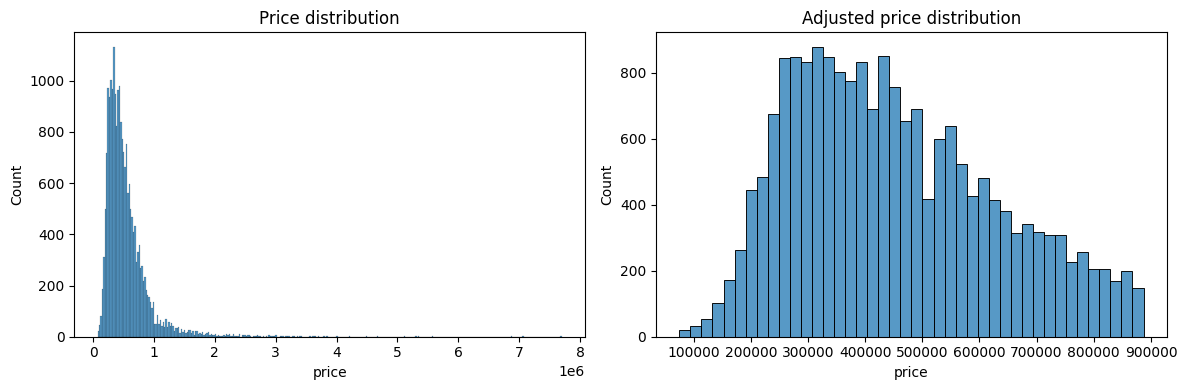

In [21]:
fig = plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.title('Price distribution')
sns.histplot(df['price'],)

plt.subplot(1, 2, 2)
plt.title('Adjusted price distribution')
df_purged = df[df.price > df.price.quantile(0.9)]
df = df[df.price <= df.price.quantile(0.9)]
# drop index=9413400165
df = df.drop(index=9413400165)
sns.histplot(df['price'])

plt.tight_layout()
plt.show()

In [22]:
df[['price']].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,price
count,19451.00
mean,450760.05
std,177720.50
min,75000.00
25%,310000.00
50%,425000.00
75%,571500.00
max,887000.00


In [23]:
purged = df_purged.shape[0]
percent = purged/(purged+df.shape[0])
print('Purged rows: {} ({:.3f})'.format(purged, percent))

Purged rows: 2161 (0.100)


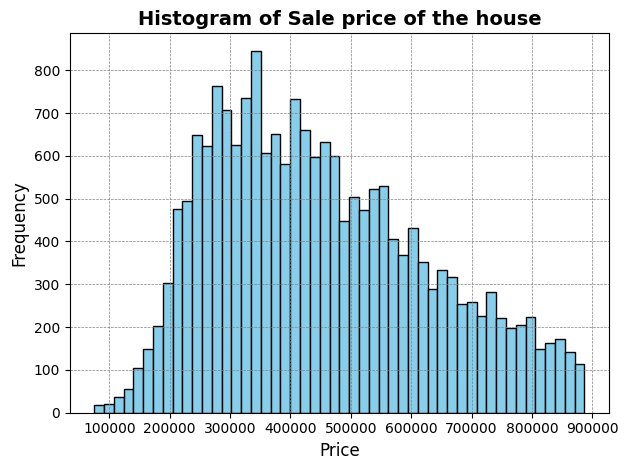

In [24]:
plot_histogram(df, column='price',bins=50 , title='Sale price of the house', xlabel='Price')

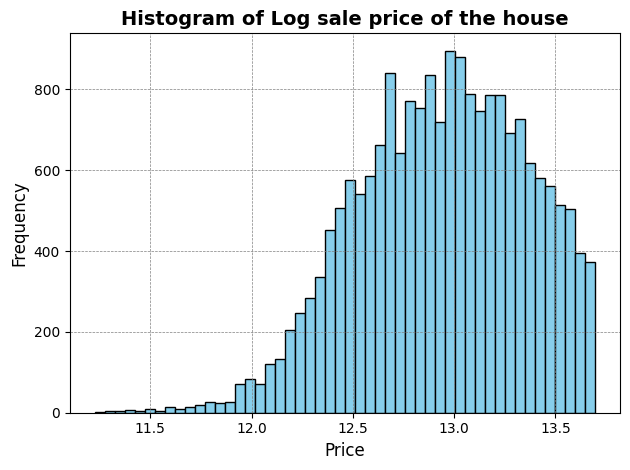

In [25]:
#log transformation
df['log_price'] = np.log(df['price'])
plot_histogram(df, column='log_price',bins=50 , title='Log sale price of the house', xlabel='Price')

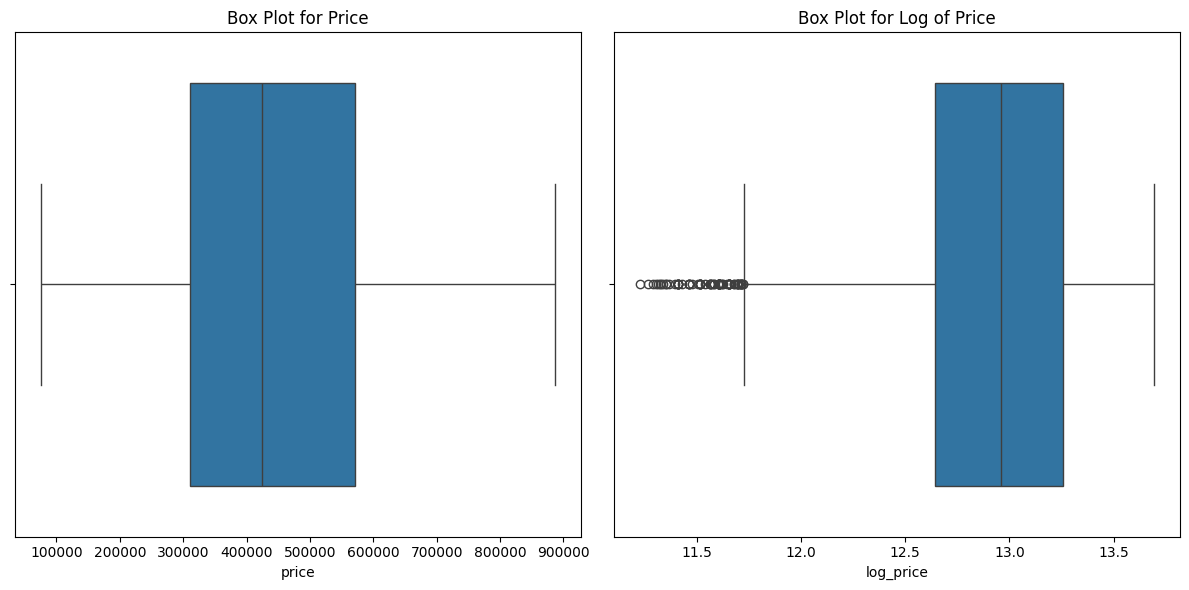

In [26]:
# Create subplots for two box plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for 'price'
sns.boxplot(data=df, x='price', ax=axes[0])
axes[0].set_title('Box Plot for Price')

# Box plot for 'log_price'
sns.boxplot(data=df, x='log_price', ax=axes[1])
axes[1].set_title('Box Plot for Log of Price')

# Show the plots
plt.tight_layout()
plt.show()


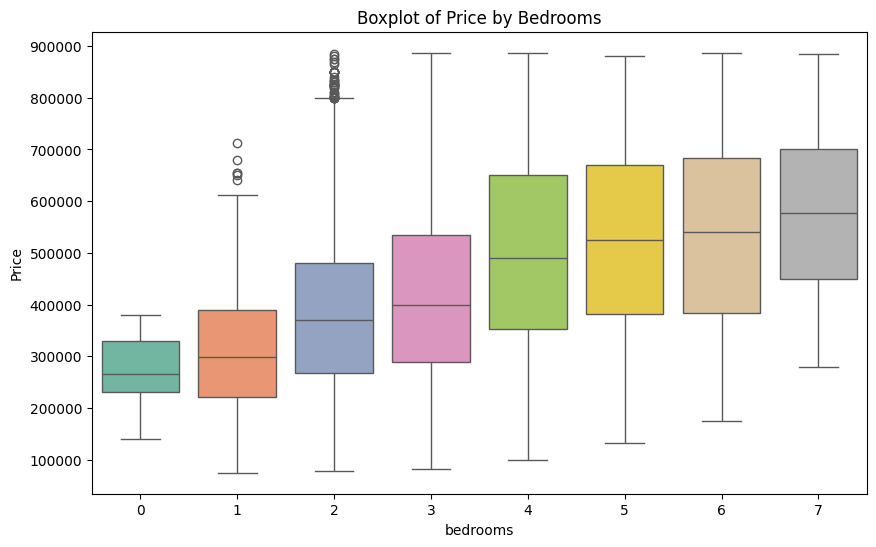

In [27]:
plot_boxplot_category(df, categorical_column='bedrooms', target_column='price',
                      title="Boxplot of Price by Bedrooms", x_label="bedrooms", y_label="Price")

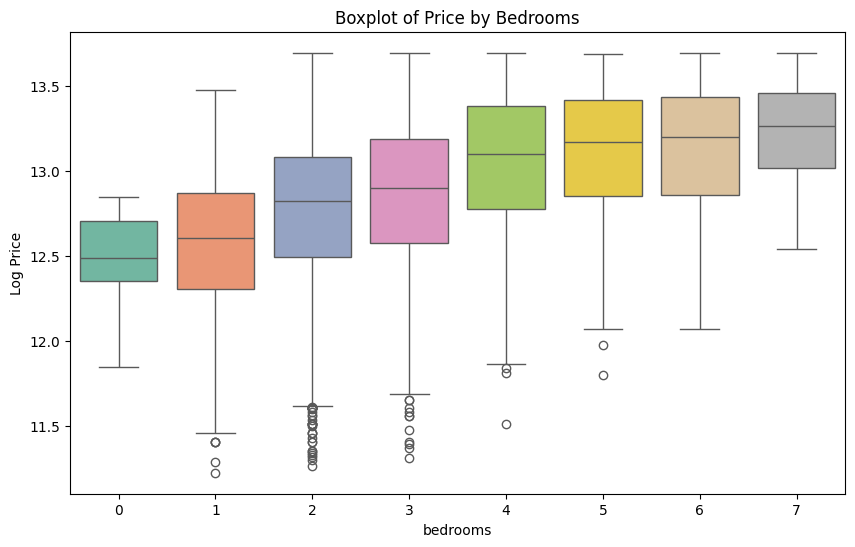

In [28]:
plot_boxplot_category(df, categorical_column='bedrooms', target_column='log_price',
                      title="Boxplot of Price by Bedrooms", x_label="bedrooms", y_label="Log Price")

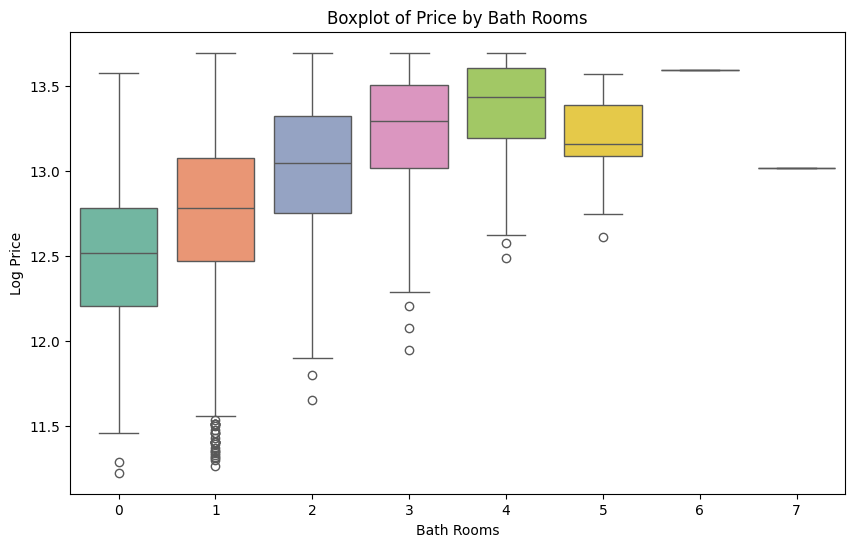

In [29]:
plot_boxplot_category(df, categorical_column='bathrooms', target_column='log_price',
                      title="Boxplot of Price by Bath Rooms", x_label="Bath Rooms", y_label="Log Price")

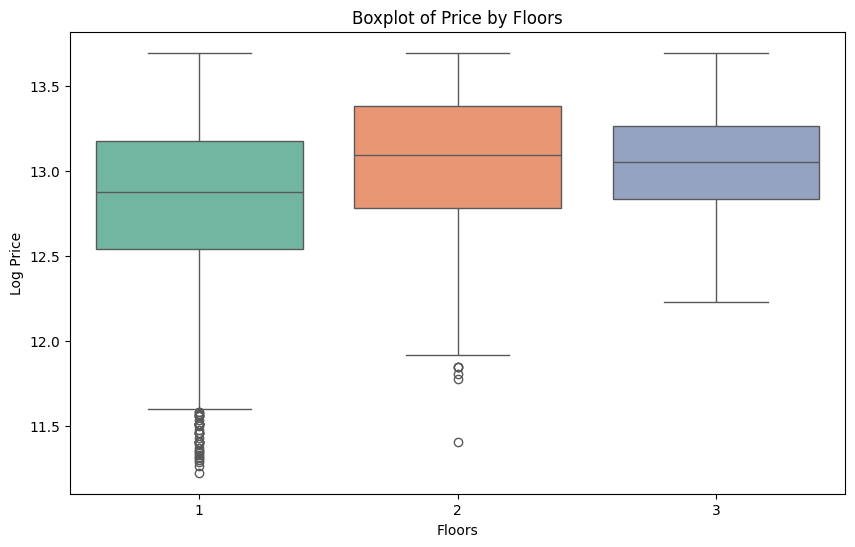

In [30]:
plot_boxplot_category(df, categorical_column='floors', target_column='log_price',
                      title="Boxplot of Price by Floors", x_label="Floors", y_label="Log Price")

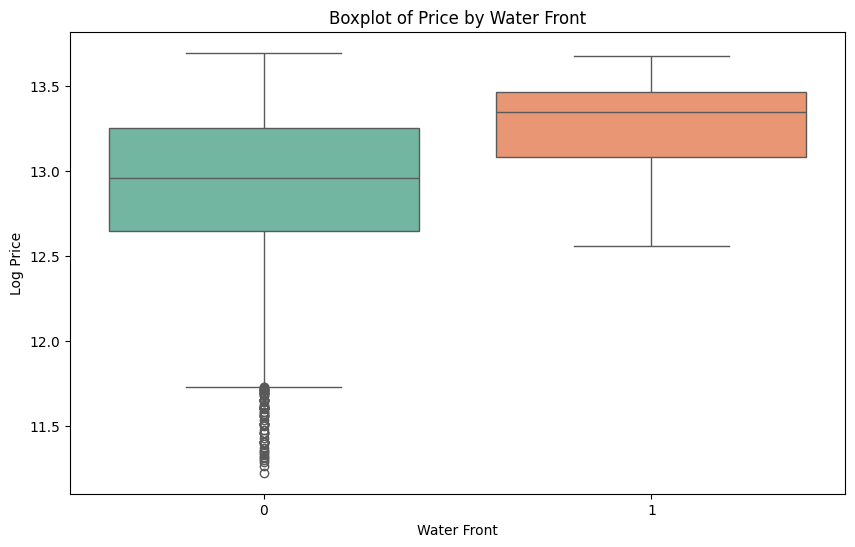

In [31]:
plot_boxplot_category(df, categorical_column='waterfront', target_column='log_price',
                      title="Boxplot of Price by Water Front", x_label="Water Front", y_label="Log Price")

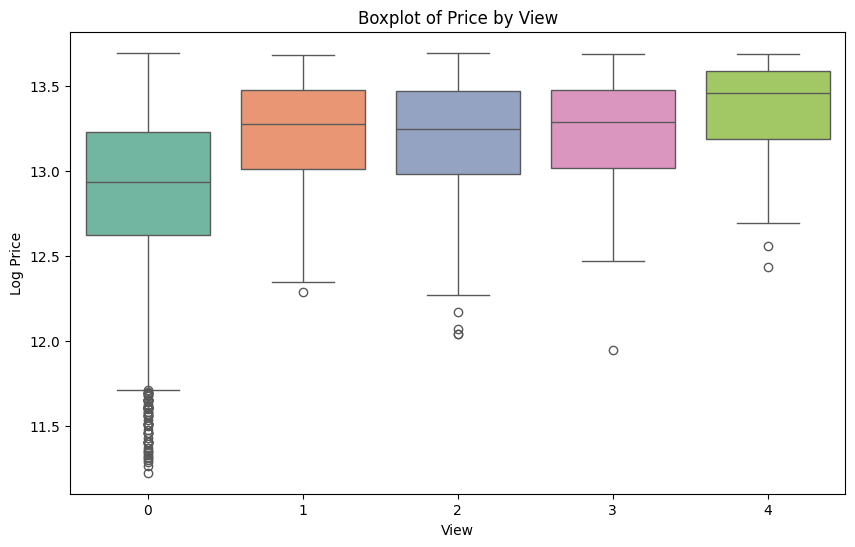

In [32]:
plot_boxplot_category(df, categorical_column='view', target_column='log_price',
                      title="Boxplot of Price by View", x_label="View", y_label="Log Price")

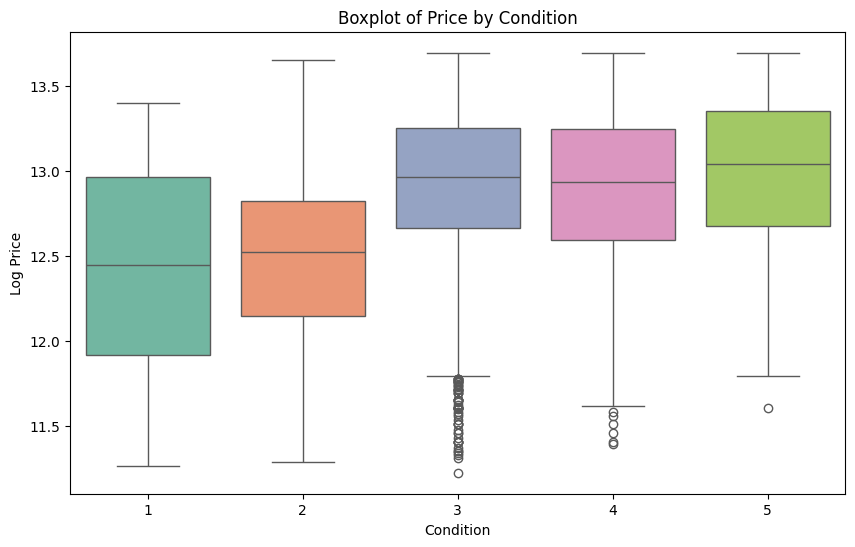

In [33]:
plot_boxplot_category(df, categorical_column='condition', target_column='log_price',
                      title="Boxplot of Price by Condition", x_label="Condition", y_label="Log Price")

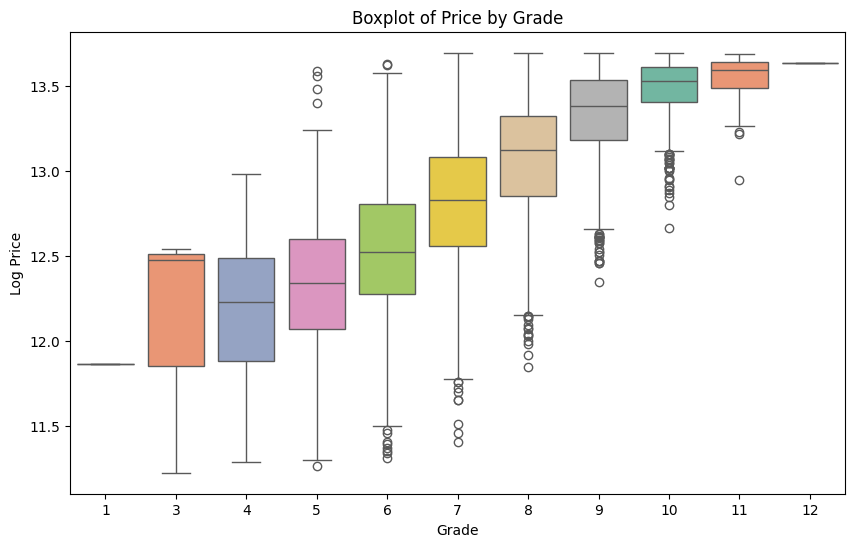

In [34]:
plot_boxplot_category(df, categorical_column='grade', target_column='log_price',
                      title="Boxplot of Price by Grade", x_label="Grade", y_label="Log Price")

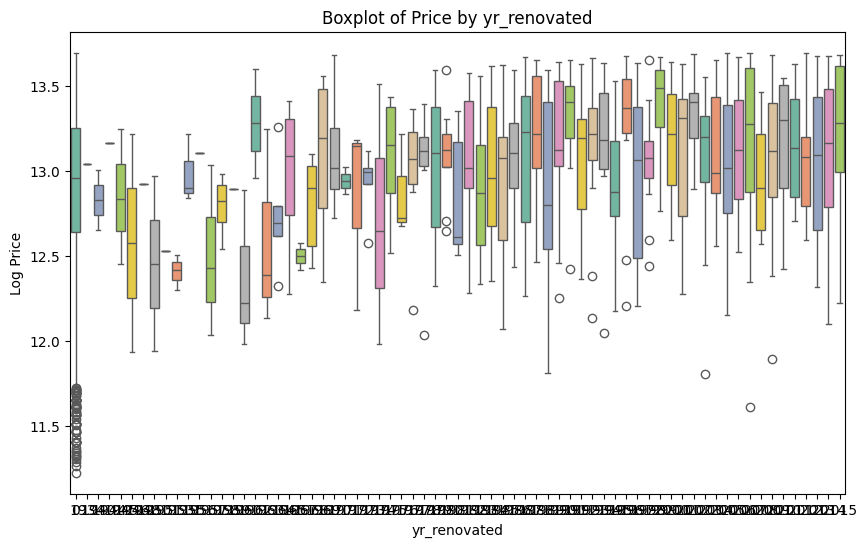

In [35]:
plot_boxplot_category(df, categorical_column='yr_renovated', target_column='log_price',
                      title="Boxplot of Price by yr_renovated", x_label="yr_renovated", y_label="Log Price")

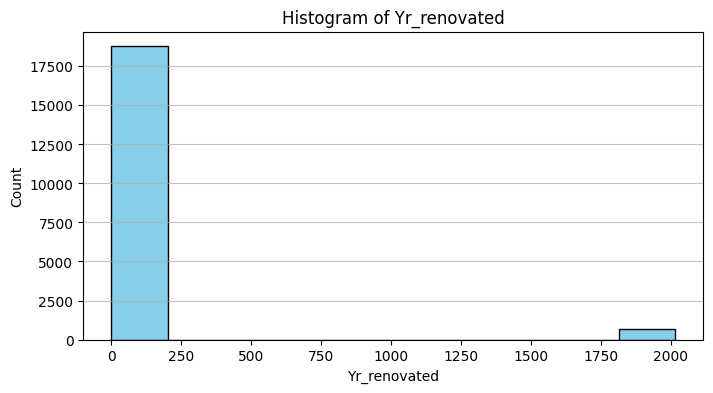

            yr_renovated yr_renovated-binned yr_renovated-binned-numeric
id                                                                      
7129300520             0               Bin 1                           1
6414100192          1991               Bin 5                           5
5631500400             0               Bin 1                           1
2487200875             0               Bin 1                           1
1954400510             0               Bin 1                           1
1321400060             0               Bin 1                           1
2008000270             0               Bin 1                           1
2414600126             0               Bin 1                           1
3793500160             0               Bin 1                           1
1736800520             0               Bin 1                           1

Value counts for binned:
yr_renovated-binned
Bin 1    18790
Bin 7      143
Bin 8      137
Bin 5      131
Bin 6      117
Bin

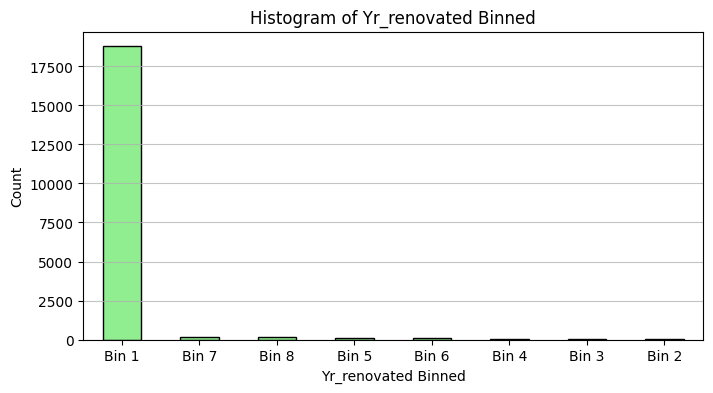

In [36]:
df = boxplot_and_convert_bin(df, column_name='yr_renovated', num_bins=7)

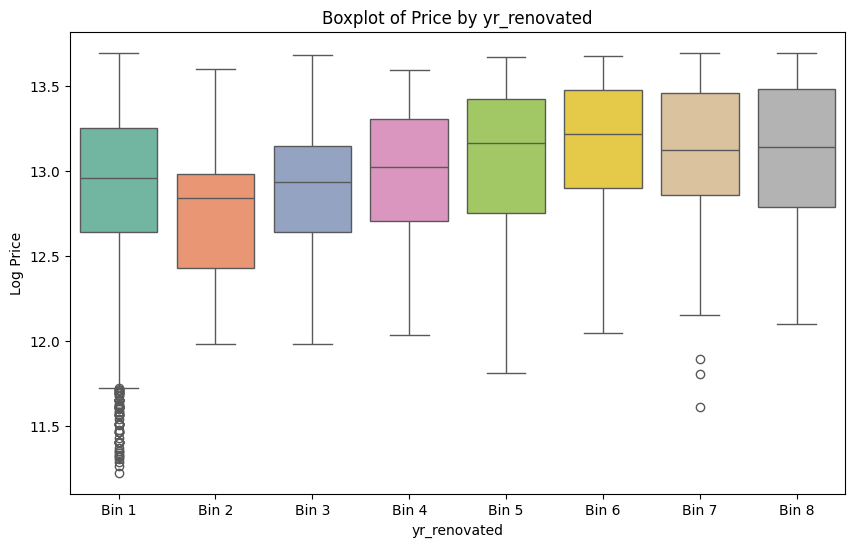

In [37]:
plot_boxplot_category(df, categorical_column='yr_renovated-binned', target_column='log_price',
                      title="Boxplot of Price by yr_renovated", x_label="yr_renovated", y_label="Log Price")

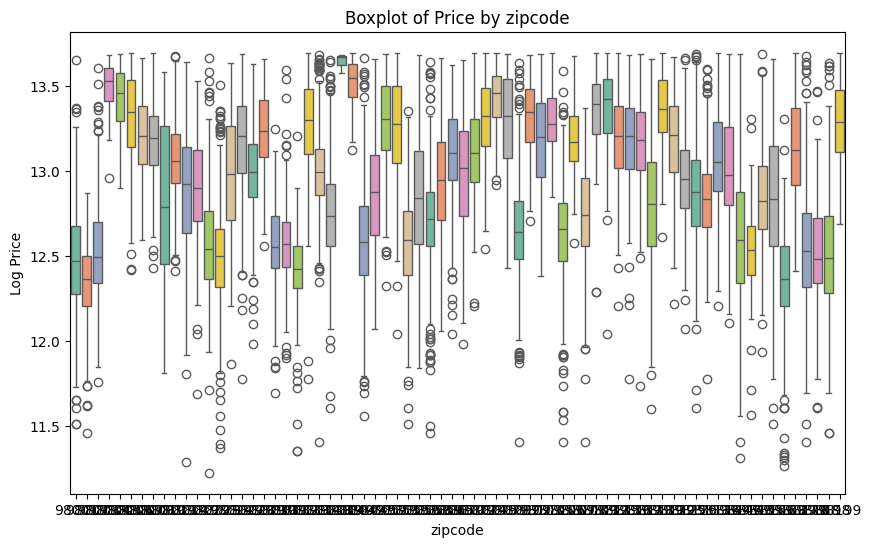

In [38]:
plot_boxplot_category(df, categorical_column='zipcode', target_column='log_price',
                      title="Boxplot of Price by zipcode", x_label="zipcode", y_label="Log Price")

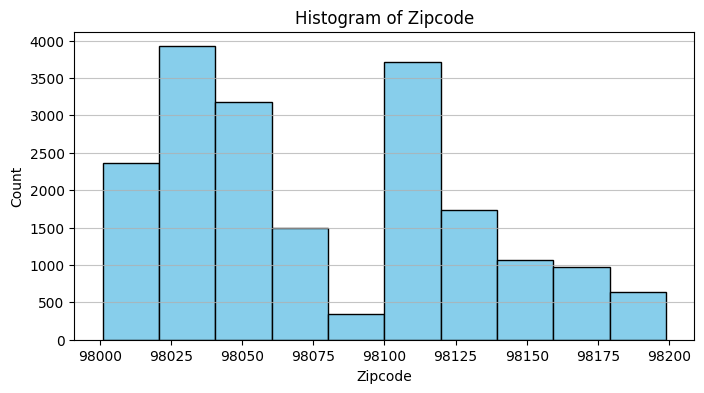

            zipcode zipcode-binned zipcode-binned-numeric
id                                                       
7129300520    98178          Bin 3                      3
6414100192    98125          Bin 3                      3
5631500400    98028          Bin 1                      1
2487200875    98136          Bin 3                      3
1954400510    98074          Bin 2                      2
1321400060    98003          Bin 1                      1
2008000270    98198          Bin 3                      3
2414600126    98146          Bin 3                      3
3793500160    98038          Bin 1                      1
1736800520    98007          Bin 1                      1

Value counts for binned:
zipcode-binned
Bin 2    6688
Bin 3    6584
Bin 1    6179
Name: count, dtype: int64


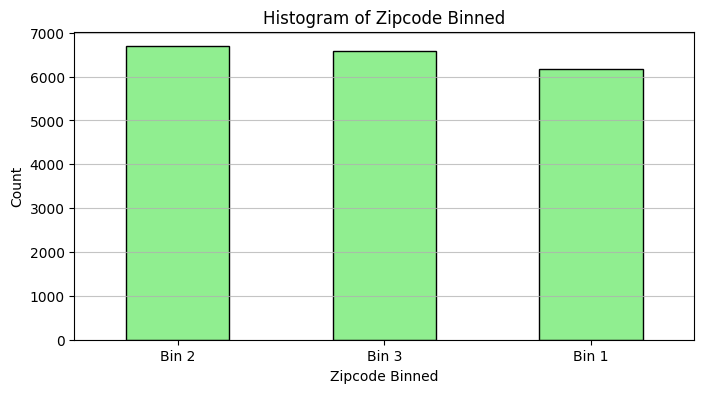

In [39]:
df = boxplot_and_convert_bin(df, column_name='zipcode', num_bins=3)

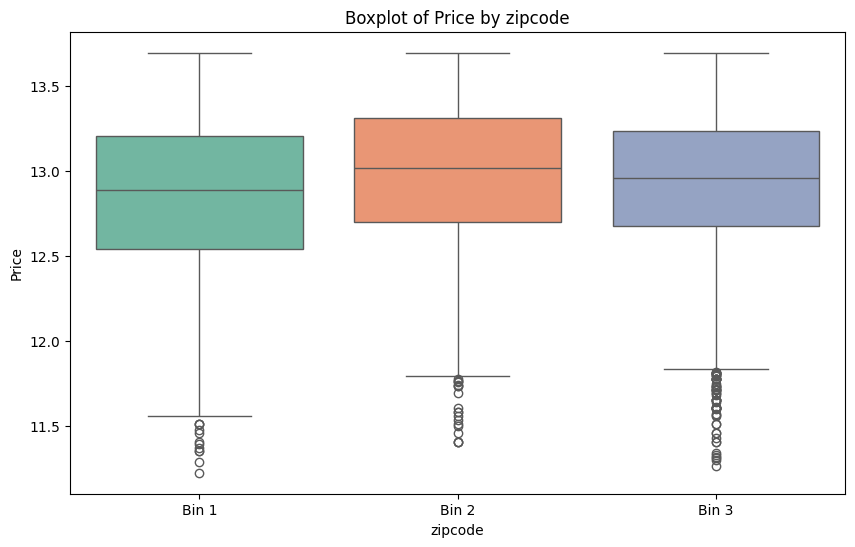

In [40]:
plot_boxplot_category(df, categorical_column='zipcode-binned', target_column='log_price',
                      title="Boxplot of Price by zipcode", x_label="zipcode", y_label="Price")

month_house_sold
5     2165
7     1988
4     1971
6     1938
8     1747
10    1689
3     1677
9     1626
12    1334
11    1279
2     1146
1      891
Name: count, dtype: int64
['10' '12' '2' '6' '1' '4' '3' '5' '7' '11' '8' '9']


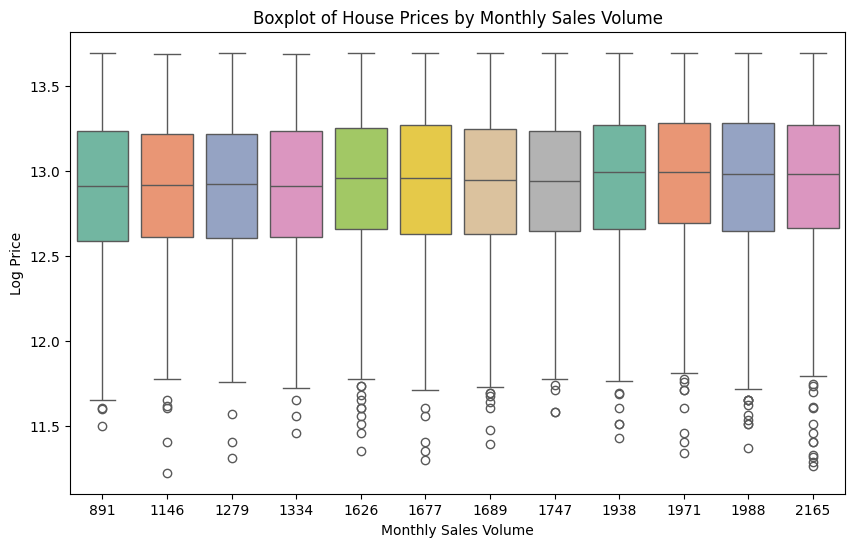

In [41]:
df['month_house_sold'] = df['date'].dt.month
df['month_house_sold'] = df['month_house_sold'].astype(str)
df['month_house_sold']
value_counts = df['month_house_sold'].value_counts()
print(value_counts)
print(df['month_house_sold'].unique())
df['month_house_sold_encoded'] = df['month_house_sold'].map(value_counts)
plot_boxplot_category(df, categorical_column='month_house_sold_encoded', target_column='log_price',
                      title="Boxplot of House Prices by Monthly Sales Volume", x_label="Monthly Sales Volume", y_label="Log Price")


In [42]:
df[['yr_built']].head()
df['yr_sold'] = df['date'].dt.year
df['yr_sold'] = df['yr_sold'].astype(int)
df['house_age'] = df['yr_sold'] -  df['yr_built']
df[['yr_sold', 'yr_built', 'house_age']].head()

,yr_sold,yr_built,house_age
id,,,
7129300520,2014,1955,59
6414100192,2014,1951,63
5631500400,2015,1933,82
2487200875,2014,1965,49
1954400510,2015,1987,28


In [43]:
# Distance to a Central Point
# Latitude and longitude of King County's own center of population 
pop_center = (47.548320, -122.229983)  
df['distance_to_center'] = df.apply(
    lambda row: geodesic((row['lat'], row['long']), pop_center).km, axis=1
)
df['distance_to_center'].head()

id
7129300520     4.601229
6414100192    20.331205
5631500400    21.079363
2487200875    12.649831
1954400510    15.862152
Name: distance_to_center, dtype: float64

In [44]:
coords = df[['lat', 'long']]

# Fit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42).fit(coords)

# Assign the cluster labels
df['geo_cluster'] = kmeans.labels_

In [45]:
# import pandas as pd
house_distance_amenities = pd.read_csv("house_distance_amenities.csv", index_col='id')
house_distance_amenities.head()

,lat,long,nearest_hospital_name,nearest_hospital_type,distance_km_hospital,nearest_university_name,nearest_university_type,distance_km_university,nearest_station_name,nearest_station_type,distance_km_station
id,,,,,,,,,,,
7129300520,47.5112,-122.257,Cascade Behavioral Health,hospital,3.939132,University of Phoenix - Western Washington Campus,university,4.824314,South Renton Park and Ride,bus_station,5.401288
6414100192,47.7210,-122.319,University of Washington Medical Center - Nort...,hospital,1.559600,PIMA Medical Institute,college,1.820426,Aurora Village Transit Center,bus_station,6.178197
5631500400,47.7379,-122.233,Fairfax Hospital,hospital,2.955235,Bastyr University,college,1.456564,Kingsgate Park & Ride,bus_station,4.146092
2487200875,47.5208,-122.393,Navos West Seattle Campus,hospital,2.523316,Highline Community College,college,3.690386,Fauntleroy Ferry Terminal Building,ferry_terminal,0.338328
1954400510,47.6168,-122.045,Swedish Hospital,hospital,7.773918,Central Washington University - Sammamish,university,1.108881,Overlake Park & Ride,bus_station,7.093464


In [46]:
house_distance_amenities = house_distance_amenities.drop(columns=['lat', 'long'])
df = df.join(house_distance_amenities)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,geo_cluster,nearest_hospital_name,nearest_hospital_type,distance_km_hospital,nearest_university_name,nearest_university_type,distance_km_university,nearest_station_name,nearest_station_type,distance_km_station
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,...,1,Cascade Behavioral Health,hospital,3.939132,University of Phoenix - Western Washington Campus,university,4.824314,South Renton Park and Ride,bus_station,5.401288
6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,...,2,University of Washington Medical Center - Nort...,hospital,1.559600,PIMA Medical Institute,college,1.820426,Aurora Village Transit Center,bus_station,6.178197
5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,...,0,Fairfax Hospital,hospital,2.955235,Bastyr University,college,1.456564,Kingsgate Park & Ride,bus_station,4.146092
2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,...,2,Navos West Seattle Campus,hospital,2.523316,Highline Community College,college,3.690386,Fauntleroy Ferry Terminal Building,ferry_terminal,0.338328
1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,...,3,Swedish Hospital,hospital,7.773918,Central Washington University - Sammamish,university,1.108881,Overlake Park & Ride,bus_station,7.093464


In [47]:
pd.options.display.max_columns = 200
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,yr_renovated-binned,yr_renovated-binned-numeric,zipcode-binned,zipcode-binned-numeric,month_house_sold,month_house_sold_encoded,yr_sold,house_age,distance_to_center,geo_cluster,nearest_hospital_name,nearest_hospital_type,distance_km_hospital,nearest_university_name,nearest_university_type,distance_km_university,nearest_station_name,nearest_station_type,distance_km_station
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982,Bin 1,1,Bin 3,3,10,1689,2014,59,4.601229,1,Cascade Behavioral Health,hospital,3.939132,University of Phoenix - Western Washington Campus,university,4.824314,South Renton Park and Ride,bus_station,5.401288
6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614,Bin 5,5,Bin 3,3,12,1334,2014,63,20.331205,2,University of Washington Medical Center - Nort...,hospital,1.559600,PIMA Medical Institute,college,1.820426,Aurora Village Transit Center,bus_station,6.178197
5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100712,Bin 1,1,Bin 1,1,2,1146,2015,82,21.079363,0,Fairfax Hospital,hospital,2.955235,Bastyr University,college,1.456564,Kingsgate Park & Ride,bus_station,4.146092
2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329,Bin 1,1,Bin 3,3,12,1334,2014,49,12.649831,2,Navos West Seattle Campus,hospital,2.523316,Highline Community College,college,3.690386,Fauntleroy Ferry Terminal Building,ferry_terminal,0.338328
1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142166,Bin 1,1,Bin 2,2,2,1146,2015,28,15.862152,3,Swedish Hospital,hospital,7.773918,Central Washington University - Sammamish,university,1.108881,Overlake Park & Ride,bus_station,7.093464


In [48]:
df[['yr_sold', 'yr_built', 'house_age','zipcode', 'lat', 'long', 'distance_to_center', 
    'geo_cluster', 'log_price']].corr()

,yr_sold,yr_built,house_age,zipcode,lat,long,distance_to_center,geo_cluster,log_price
yr_sold,1.000000,0.000010,0.016139,0.004382,-0.032858,-0.001783,0.005993,-0.003990,0.006904
yr_built,0.000010,1.000000,-0.999870,-0.345646,-0.160707,0.405485,0.232655,-0.110992,0.085794
house_age,0.016139,-0.999870,1.000000,0.345671,0.160156,-0.405461,-0.232527,0.110913,-0.085671
zipcode,0.004382,-0.345646,0.345671,1.000000,0.284342,-0.559426,-0.307508,0.370599,-0.005043
lat,-0.032858,-0.160707,0.160156,0.284342,1.000000,-0.132578,-0.189449,0.073887,0.492475
long,-0.001783,0.405485,-0.405461,-0.559426,-0.132578,1.000000,0.348167,0.010011,0.085789
distance_to_center,0.005993,0.232655,-0.232527,-0.307508,-0.189449,0.348167,1.000000,0.026035,-0.160063
geo_cluster,-0.003990,-0.110992,0.110913,0.370599,0.073887,0.010011,0.026035,1.000000,0.060467
log_price,0.006904,0.085794,-0.085671,-0.005043,0.492475,0.085789,-0.160063,0.060467,1.000000


In [49]:
df[['date', 'month_house_sold', 'month_house_sold_encoded', 'yr_renovated', 'yr_renovated-binned-numeric', 
    'zipcode', 'zipcode-binned-numeric', 'log_price']].corr()

,date,month_house_sold,month_house_sold_encoded,yr_renovated,yr_renovated-binned-numeric,zipcode,zipcode-binned-numeric,log_price
date,1.000000,-0.348711,-0.355197,-0.021600,-0.022212,0.001421,-0.002955,-0.004530
month_house_sold,-0.348711,1.000000,-0.055259,0.011631,0.008887,-0.005710,-0.006110,-0.015220
month_house_sold_encoded,-0.355197,-0.055259,1.000000,0.009948,0.011814,0.002416,0.008110,0.047465
yr_renovated,-0.021600,0.011631,0.009948,1.000000,0.935299,0.061877,0.066712,0.055703
yr_renovated-binned-numeric,-0.022212,0.008887,0.011814,0.935299,1.000000,0.057886,0.063536,0.065454
zipcode,0.001421,-0.005710,0.002416,0.061877,0.057886,1.000000,0.911334,-0.005043
zipcode-binned-numeric,-0.002955,-0.006110,0.008110,0.066712,0.063536,0.911334,1.000000,0.052209
log_price,-0.004530,-0.015220,0.047465,0.055703,0.065454,-0.005043,0.052209,1.000000


In [50]:
df['sqft_lot_ratio'] = df['sqft_lot'] / (df['sqft_above'] + df['sqft_basement'] + df['sqft_lot'])
df['sqft_lot15_ratio'] = df['sqft_lot15'] / (df['sqft_above'] + df['sqft_basement'] + df['sqft_lot15'])

df['sqft_basement_ratio'] = df['sqft_basement'] / (df['sqft_above'] + df['sqft_basement'] + df['sqft_lot'])

df.drop(['yr_sold', 'yr_built', 'date', 'month_house_sold', 'yr_renovated', 'yr_renovated-binned', 'zipcode-binned',
        'nearest_university_name', 'nearest_university_type', 'nearest_station_name', 'nearest_station_type',
        'nearest_hospital_type', 'nearest_hospital_name', 'sqft_lot', 'sqft_lot15', 'sqft_basement', 
         'zipcode-binned-numeric', 'price'], axis = 1, inplace =True)
df.rename(columns = {'yr_renovated-binned-numeric': 'yr_renovated_binned', 
                     'month_house_sold_encoded': 'month_house_sold'}, inplace =True)


In [51]:
df.corr()['log_price'].sort_values()

sqft_lot15_ratio         -0.276856
sqft_lot_ratio           -0.250310
distance_to_center       -0.160063
house_age                -0.085671
distance_km_station      -0.081180
distance_km_hospital     -0.043814
distance_km_university   -0.016345
zipcode                  -0.005043
condition                 0.034965
waterfront                0.038354
month_house_sold          0.047465
geo_cluster               0.060467
yr_renovated_binned       0.065454
long                      0.085789
view                      0.175558
sqft_basement_ratio       0.204920
floors                    0.246856
bedrooms                  0.277419
bathrooms                 0.370344
sqft_above                0.463680
lat                       0.492475
sqft_living15             0.506007
sqft_living               0.559743
grade                     0.582914
log_price                 1.000000
Name: log_price, dtype: float64

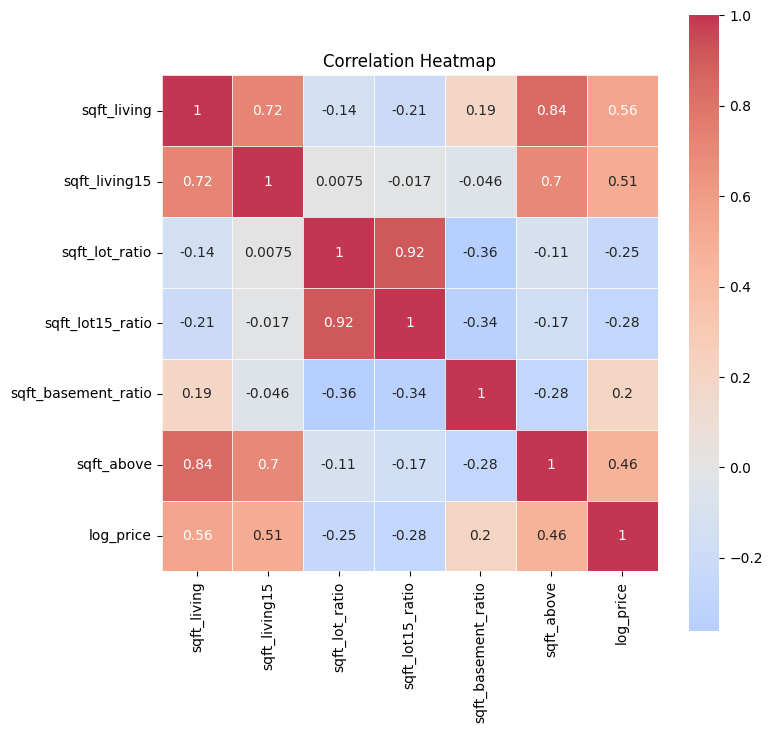

In [52]:
sqft_features = ['sqft_living', 'sqft_living15', 'sqft_lot_ratio', 'sqft_lot15_ratio', 'sqft_basement_ratio', 
                 'sqft_above', 'log_price']
plot_corr_heatmap(df[sqft_features])

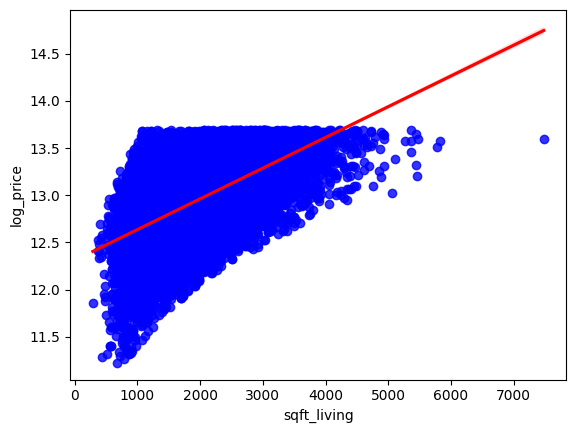

In [53]:
sns.regplot(x="sqft_living", y="log_price", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

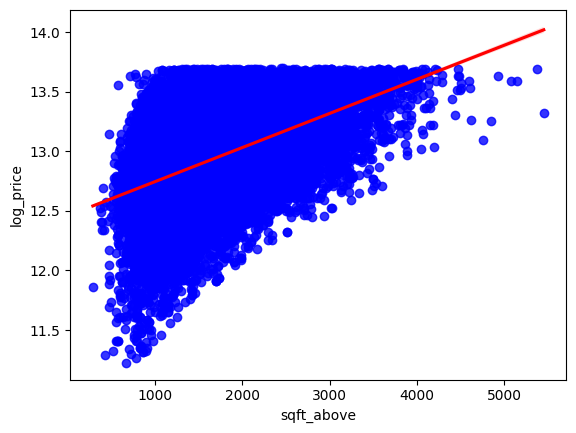

In [54]:
sns.regplot(x="sqft_above", y="log_price", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

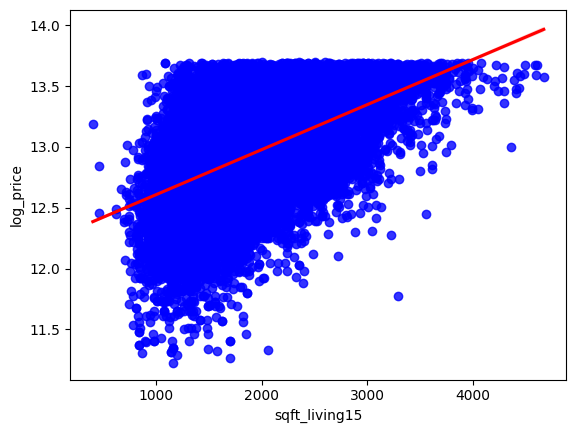

In [55]:
sns.regplot(x="sqft_living15", y="log_price", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

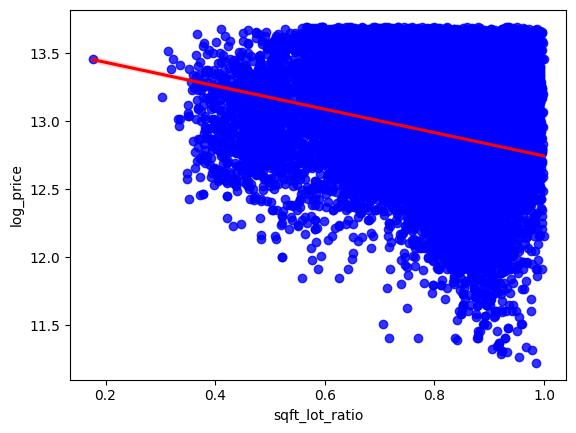

In [56]:
sns.regplot(x="sqft_lot_ratio", y="log_price", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

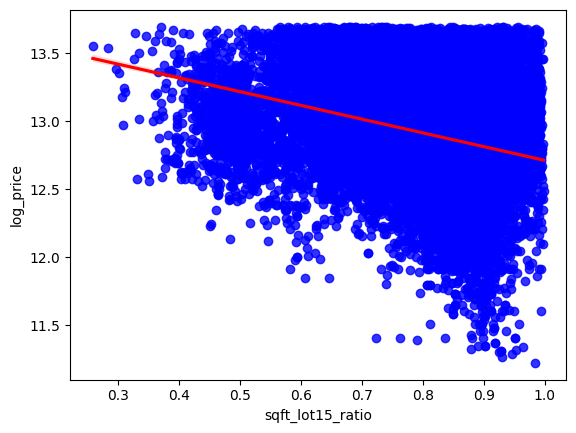

In [57]:
sns.regplot(x="sqft_lot15_ratio", y="log_price", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

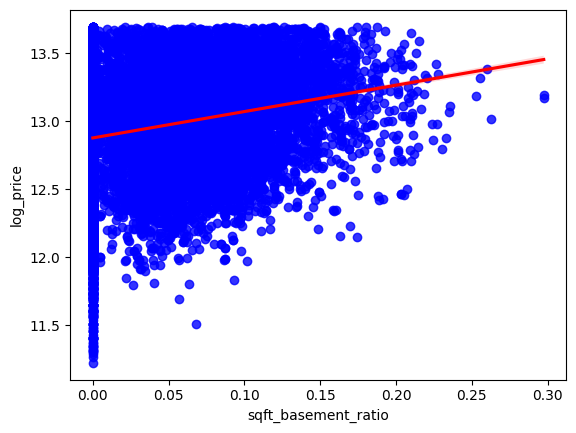

In [58]:
sns.regplot(x="sqft_basement_ratio", y="log_price", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

In [59]:
sqft_features = ['sqft_living', 'sqft_living15', 'sqft_lot_ratio', 'sqft_lot15_ratio', 'sqft_basement_ratio', 'sqft_above']
df[sqft_features].describe()

,sqft_living,sqft_living15,sqft_lot_ratio,sqft_lot15_ratio,sqft_basement_ratio,sqft_above
count,19789.000000,19789.000000,19789.000000,19789.000000,19789.000000,19789.000000
mean,1910.163828,1876.252918,0.783223,0.783548,0.027768,1653.832129
std,720.483422,572.903031,0.121870,0.114628,0.044304,678.205877
min,290.000000,399.000000,0.176871,0.259259,0.000000,290.000000
25%,1370.000000,1450.000000,0.718747,0.722412,0.000000,1150.000000
50%,1810.000000,1770.000000,0.806889,0.804672,0.000000,1480.000000
75%,2350.000000,2220.000000,0.866505,0.861357,0.050690,2020.000000
max,7480.000000,4670.000000,0.999391,0.998291,0.297450,5450.000000


In [60]:
sqft_features = ['sqft_living', 'sqft_living15', 'sqft_above']
for feature in sqft_features:
    non_positive_values = df[df[feature] <= 0]  
    if not non_positive_values.empty:
        print(f"Feature '{feature}' contains non-positive values:")
        print(non_positive_values[[feature]])

In [61]:
df = transform_to_log(df, sqft_features)
df.drop(['sqft_living', 'sqft_living15', 'sqft_above'], axis = 1, inplace =True)

In [62]:
df.corr()['log_price'].sort_values()

sqft_lot15_ratio         -0.276856
sqft_lot_ratio           -0.250310
distance_to_center       -0.160063
house_age                -0.085671
distance_km_station      -0.081180
distance_km_hospital     -0.043814
distance_km_university   -0.016345
zipcode                  -0.005043
condition                 0.034965
waterfront                0.038354
month_house_sold          0.047465
geo_cluster               0.060467
yr_renovated_binned       0.065454
long                      0.085789
view                      0.175558
sqft_basement_ratio       0.204920
floors                    0.246856
bedrooms                  0.277419
bathrooms                 0.370344
log_sqft_above            0.466872
lat                       0.492475
log_sqft_living15         0.509017
log_sqft_living           0.565373
grade                     0.582914
log_price                 1.000000
Name: log_price, dtype: float64

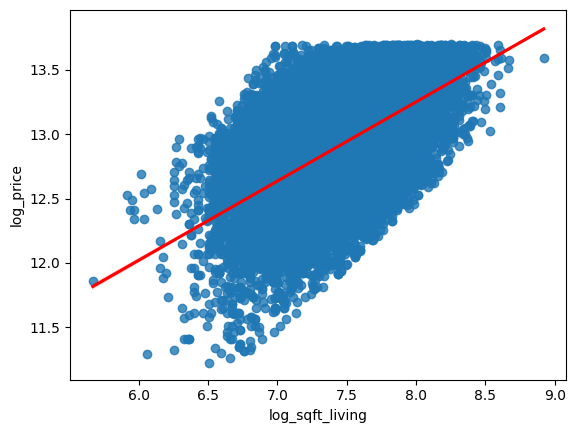

In [63]:
sns.regplot(x="log_sqft_living", y="log_price", data=df, line_kws={"color": "red"})
plt.show()

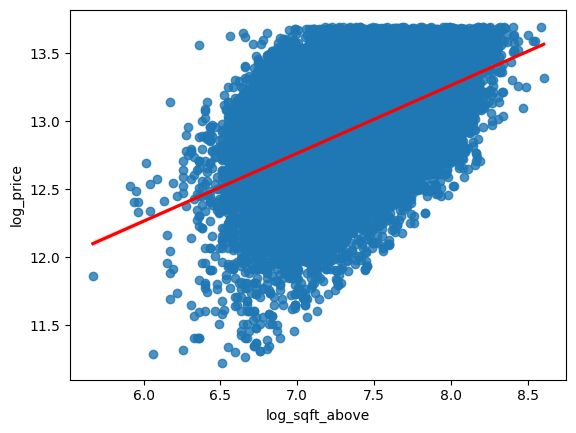

In [64]:
sns.regplot(x="log_sqft_above", y="log_price", data=df, line_kws={"color": "red"})
plt.show()

In [65]:
summarize_dataframe(df)
df['geo_cluster'].dtype


Data Total Number of Each Type:
 float64     13
int64       10
category     1
int32        1
Name: count, dtype: int64

Float Types Count:
 lat                        4992
long                        748
log_price                  3221
distance_to_center        18721
distance_km_hospital      18721
distance_km_university    18721
distance_km_station       18721
sqft_lot_ratio            17214
sqft_lot15_ratio          16783
sqft_basement_ratio        6824
log_sqft_living             850
log_sqft_living15           683
log_sqft_above              797
dtype: int64

Integer Types Count:
 bedrooms              8
bathrooms             8
floors                3
waterfront            2
view                  5
condition             5
grade                11
zipcode              70
month_house_sold     12
house_age           117
dtype: int64

Object Types Count:
 Series([], dtype: float64)

Data Dimension: (19789, 25)


dtype('int32')

In [66]:
df2 = df.copy()
df2 = convert_to_categorical(df2, min_unique=2, max_unique=12)
df2

Converted columns to categorical: ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_renovated_binned', 'month_house_sold', 'geo_cluster']


,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,lat,long,log_price,yr_renovated_binned,month_house_sold,house_age,distance_to_center,geo_cluster,distance_km_hospital,distance_km_university,distance_km_station,sqft_lot_ratio,sqft_lot15_ratio,sqft_basement_ratio,log_sqft_living,log_sqft_living15,log_sqft_above
id,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,3,1,1,0,0,3,7,98178,47.5112,-122.257,12.309982,1,1689,59,4.601229,1,3.939132,4.824314,5.401288,0.827233,0.827233,0.000000,7.073270,7.200425,7.073270
6414100192,3,2,2,0,0,3,7,98125,47.7210,-122.319,13.195614,5,1334,63,20.331205,2,1.559600,1.820426,6.178197,0.738076,0.748261,0.040766,7.851661,7.432484,7.682482
5631500400,2,1,1,0,0,3,6,98028,47.7379,-122.233,12.100712,1,1146,82,21.079363,0,2.955235,1.456564,4.146092,0.928505,0.912817,0.000000,6.646391,7.908387,6.646391
2487200875,4,3,1,0,0,5,7,98136,47.5208,-122.393,13.311329,1,1334,49,12.649831,2,2.523316,3.690386,0.338328,0.718391,0.718391,0.130747,7.580700,7.215240,6.956545
1954400510,3,2,1,0,0,3,8,98074,47.6168,-122.045,13.142166,1,1146,28,15.862152,3,7.773918,1.108881,7.093464,0.827869,0.817053,0.000000,7.426549,7.495542,7.426549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2,3,0,0,3,8,98103,47.6993,-122.346,12.793859,1,2165,5,18.916436,2,1.778450,1.021632,8.360616,0.425028,0.496545,0.000000,7.333023,7.333023,7.333023
6600060120,4,2,2,0,0,3,8,98146,47.5107,-122.362,12.899220,1,1146,1,10.785129,2,1.984863,1.406920,1.187892,0.715622,0.757098,0.000000,7.745003,7.512071,7.745003
1523300141,2,0,2,0,0,3,7,98144,47.5944,-122.299,12.904459,1,1938,5,7.294822,2,1.673029,0.370437,1.869760,0.569620,0.663033,0.000000,6.927558,6.927558,6.927558


In [67]:
df2 = encode_and_one_hot(df2)
df2

DataFrame shape before encoding: (19789, 25)
Label-encoded columns: ['waterfront']
One-hot encoded columns: ['floors', 'month_house_sold', 'geo_cluster', 'view', 'bedrooms', 'grade', 'yr_renovated_binned', 'condition', 'bathrooms']
DataFrame shape after encoding: (19789, 71)


,waterfront,zipcode,lat,long,log_price,house_age,distance_to_center,distance_km_hospital,distance_km_university,distance_km_station,sqft_lot_ratio,sqft_lot15_ratio,sqft_basement_ratio,log_sqft_living,log_sqft_living15,log_sqft_above,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bathrooms_1,bathrooms_2,bathrooms_3,bathrooms_4,bathrooms_5,bathrooms_6,bathrooms_7,floors_2,floors_3,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,yr_renovated_binned_2,yr_renovated_binned_3,yr_renovated_binned_4,yr_renovated_binned_5,yr_renovated_binned_6,yr_renovated_binned_7,yr_renovated_binned_8,month_house_sold_1146,month_house_sold_1279,month_house_sold_1334,month_house_sold_1626,month_house_sold_1677,month_house_sold_1689,month_house_sold_1747,month_house_sold_1938,month_house_sold_1971,month_house_sold_1988,month_house_sold_2165,geo_cluster_1,geo_cluster_2,geo_cluster_3
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,0,98178,47.5112,-122.257,12.309982,59,4.601229,3.939132,4.824314,5.401288,0.827233,0.827233,0.000000,7.073270,7.200425,7.073270,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
6414100192,0,98125,47.7210,-122.319,13.195614,63,20.331205,1.559600,1.820426,6.178197,0.738076,0.748261,0.040766,7.851661,7.432484,7.682482,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
5631500400,0,98028,47.7379,-122.233,12.100712,82,21.079363,2.955235,1.456564,4.146092,0.928505,0.912817,0.000000,6.646391,7.908387,6.646391,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2487200875,0,98136,47.5208,-122.393,13.311329,49,12.649831,2.523316,3.690386,0.338328,0.718391,0.718391,0.130747,7.580700,7.215240,6.956545,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1954400510,0,98074,47.6168,-122.045,13.142166,28,15.862152,7.773918,1.108881,7.093464,0.827869,0.817053,0.000000,7.426549,7.495542,7.426549,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,0,98103,47.6993,-122.346,12.793859,5,18.916436,1.778450,1.021632,8.360616,0.425028,0.496545,0.000000,7.333023,7.333023,7.333023,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,Tru

In [68]:
df2['waterfront'] = df2['waterfront'].astype(bool)
summarize_dataframe(df2)


Data Total Number of Each Type:
 bool       56
float64    13
int64       2
Name: count, dtype: int64

Float Types Count:
 lat                        4992
long                        748
log_price                  3221
distance_to_center        18721
distance_km_hospital      18721
distance_km_university    18721
distance_km_station       18721
sqft_lot_ratio            17214
sqft_lot15_ratio          16783
sqft_basement_ratio        6824
log_sqft_living             850
log_sqft_living15           683
log_sqft_above              797
dtype: int64

Integer Types Count:
 zipcode       70
house_age    117
dtype: int64

Object Types Count:
 Series([], dtype: float64)

Data Dimension: (19789, 71)


In [69]:
# Select columns with data types float64 or int64
numeric_columns = df2.select_dtypes(include=['float64', 'int64']).drop(columns=['log_price']).columns
print("Numeric columns:", numeric_columns.tolist())
bool_columns = df2.select_dtypes(include=['bool']).columns
print("\nBool columns:", bool_columns.tolist())

Numeric columns: ['zipcode', 'lat', 'long', 'house_age', 'distance_to_center', 'distance_km_hospital', 'distance_km_university', 'distance_km_station', 'sqft_lot_ratio', 'sqft_lot15_ratio', 'sqft_basement_ratio', 'log_sqft_living', 'log_sqft_living15', 'log_sqft_above']

Bool columns: ['waterfront', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3', 'bathrooms_4', 'bathrooms_5', 'bathrooms_6', 'bathrooms_7', 'floors_2', 'floors_3', 'view_1', 'view_2', 'view_3', 'view_4', 'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'yr_renovated_binned_2', 'yr_renovated_binned_3', 'yr_renovated_binned_4', 'yr_renovated_binned_5', 'yr_renovated_binned_6', 'yr_renovated_binned_7', 'yr_renovated_binned_8', 'month_house_sold_1146', 'month_house_sold_1279', 'month_house_sold_1334', 'month_ho

# Model Development

In [71]:
X = df2.drop(columns=['log_price'])
y = df2['log_price']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("X train data shape:",X_train.shape)
print("X test data shape:", X_test.shape)
print("Y test data shape:", y_test.shape)

X train data shape: (13852, 70)
X test data shape: (5937, 70)
Y test data shape: (5937,)


In [73]:
lm = LinearRegression()

evaluate_model(lm, X_train, X_test, y_train, y_test)

R-squared Score: 0.7356
Root Mean Squared Error: 91953.9141
Mean Absolute Error: 67796.2341
Mean Absolute Percentage Error: 0.1644


In [74]:
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler()), 
    ('poly', PolynomialFeatures(degree=2)) 
])

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),  
        ('bool', 'passthrough', bool_columns) 
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('regressor', LinearRegression()) 
])

pipeline.fit(X_train, y_train)

y_pred_log = pipeline.predict(X_test)
y_pred = np.exp(y_pred_log)
y_true = np.exp(y_test)

r2_score_value = r2_score(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared Score: {r2_score_value:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Absolute Percentage Error: {mape:.4f}")


R-squared Score: 0.8235
Root Mean Squared Error: 75118.3263
Mean Absolute Error: 54234.5886
Mean Absolute Percentage Error: 0.1322


# Model Evaluation and Refinement


Processing degree 3: 100%|██████████| 3/3 [00:05<00:00,  1.93s/it]


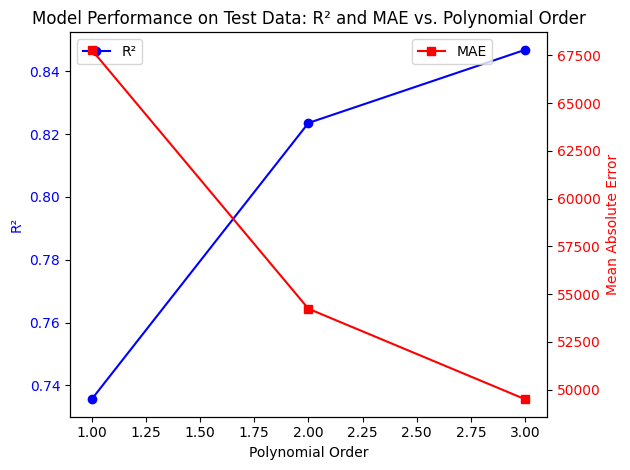

Cross-Validation Results:
Degree 1: Mean R² = -269486019543451136.0000, Std = 538972039086902272.0000
Degree 2: Mean R² = 0.8303, Std = 0.0065
Degree 3: Mean R² = 0.8363, Std = 0.0200

Best Model (Test Data):
Best polynomial order: 3
Highest R²: 0.8468
Lowest MAE: 49494.4096

Best Model (Cross-Validation):
Best polynomial order: 3
Mean R²: 0.8363
Standard Deviation: 0.0200


In [76]:

from tqdm import tqdm

Rsqu_test = []
MAE_test = []
CV_scores_mean = []
CV_scores_std = []

order = [1, 2, 3]
pbar = tqdm(order)

for n in pbar:
    # Update progress bar description
    pbar.set_description(f"Processing degree {n}")

    numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler()), 
    ('poly', PolynomialFeatures(degree=n)) 
    ])
    
    # Define the column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_columns),  
            ('bool', 'passthrough', bool_columns) 
        ]
    )
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  
        ('regressor', LinearRegression()) 
    ])
    
    pipeline.fit(X_train, y_train)
    
    y_pred_log = pipeline.predict(X_test)
    y_pred = np.exp(y_pred_log)
    y_true = np.exp(y_test)
        
    Rsqu_test.append(r2_score(y_true, y_pred))
    MAE_test.append(mean_absolute_error(y_true, y_pred))
   
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    CV_scores_mean.append(cv_scores.mean())
    CV_scores_std.append(cv_scores.std())

# Plot R² and MSE
fig, ax1 = plt.subplots()

# R² Plot
ax1.plot(order, Rsqu_test, 'b-o', label="R²")
ax1.set_xlabel("Polynomial Order")
ax1.set_ylabel("R²", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.legend(loc='upper left')

# MSE Plot
ax2 = ax1.twinx()
ax2.plot(order, MAE_test, 'r-s', label="MAE")
ax2.set_ylabel("Mean Absolute Error", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.legend(loc='upper right', bbox_to_anchor=(0.9, 1))

# Add title
plt.title("Model Performance on Test Data: R² and MAE vs. Polynomial Order")
fig.tight_layout()
plt.show()

# Cross-Validation Results
print("Cross-Validation Results:")
for i, n in enumerate(order):
    print(f"Degree {n}: Mean R² = {CV_scores_mean[i]:.4f}, Std = {CV_scores_std[i]:.4f}")

# Output the best combination based on R² and MAE
best_index = max(range(len(Rsqu_test)), key=lambda i: (Rsqu_test[i], -MAE_test[i]))
print("\nBest Model (Test Data):")
print(f"Best polynomial order: {order[best_index]}")
print(f"Highest R²: {Rsqu_test[best_index]:.4f}")
print(f"Lowest MAE: {MAE_test[best_index]:.4f}")

# Output the best cross-validated score
best_cv_index = max(range(len(CV_scores_mean)), key=lambda i: CV_scores_mean[i])
print("\nBest Model (Cross-Validation):")
print(f"Best polynomial order: {order[best_cv_index]}")
print(f"Mean R²: {CV_scores_mean[best_cv_index]:.4f}")
print(f"Standard Deviation: {CV_scores_std[best_cv_index]:.4f}")

In [77]:
# Best Model (Test Data):
# Best polynomial order: 3
# Highest R²: 0.8508
# Lowest MAE: 54694.4856

# Best Model (Cross-Validation):
# Best polynomial order: 3
# Mean R²: 0.8582
# Standard Deviation: 0.0095

# Ridge Regression

Processing degree 4: 100%|██████████| 4/4 [00:16<00:00,  4.21s/it]


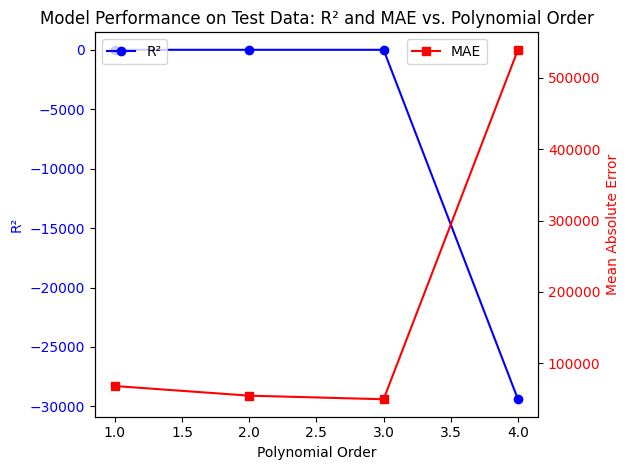

Cross-Validation Results:
Degree 1: Mean R² = 0.7532, Std = 0.0105
Degree 2: Mean R² = 0.8304, Std = 0.0062
Degree 3: Mean R² = 0.8454, Std = 0.0061
Degree 4: Mean R² = 0.4237, Std = 0.2654

Best Model (Test Data):
Best polynomial order: 3
Highest R²: 0.8498
Lowest MAE: 49254.8415

Best Model (Cross-Validation):
Best polynomial order: 3
Mean R²: 0.8454
Standard Deviation: 0.0061


In [79]:

from tqdm import tqdm

Rsqu_test = []
MAE_test = []
CV_scores_mean = []
CV_scores_std = []

order = [1, 2, 3, 4]
pbar = tqdm(order)

for n in pbar:
    # Update progress bar description
    pbar.set_description(f"Processing degree {n}")

    numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler()), 
    ('poly', PolynomialFeatures(degree=n)) 
    ])
    
    # Define the column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_columns),  
            ('bool', 'passthrough', bool_columns) 
        ]
    )
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  
        ('ridge', Ridge(alpha=0.1)) 
    ])
    
    pipeline.fit(X_train, y_train)
    
    y_pred_log = pipeline.predict(X_test)
    y_pred = np.exp(y_pred_log)
    y_true = np.exp(y_test)
        
    Rsqu_test.append(r2_score(y_true, y_pred))
    MAE_test.append(mean_absolute_error(y_true, y_pred))
   
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    CV_scores_mean.append(cv_scores.mean())
    CV_scores_std.append(cv_scores.std())

# Plot R² and MSE
fig, ax1 = plt.subplots()

# R² Plot
ax1.plot(order, Rsqu_test, 'b-o', label="R²")
ax1.set_xlabel("Polynomial Order")
ax1.set_ylabel("R²", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.legend(loc='upper left')

# MSE Plot
ax2 = ax1.twinx()
ax2.plot(order, MAE_test, 'r-s', label="MAE")
ax2.set_ylabel("Mean Absolute Error", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.legend(loc='upper right', bbox_to_anchor=(0.9, 1))

# Add title
plt.title("Model Performance on Test Data: R² and MAE vs. Polynomial Order")
fig.tight_layout()
plt.show()

# Cross-Validation Results
print("Cross-Validation Results:")
for i, n in enumerate(order):
    print(f"Degree {n}: Mean R² = {CV_scores_mean[i]:.4f}, Std = {CV_scores_std[i]:.4f}")

# Output the best combination based on R² and MAE
best_index = max(range(len(Rsqu_test)), key=lambda i: (Rsqu_test[i], -MAE_test[i]))
print("\nBest Model (Test Data):")
print(f"Best polynomial order: {order[best_index]}")
print(f"Highest R²: {Rsqu_test[best_index]:.4f}")
print(f"Lowest MAE: {MAE_test[best_index]:.4f}")

# Output the best cross-validated score
best_cv_index = max(range(len(CV_scores_mean)), key=lambda i: CV_scores_mean[i])
print("\nBest Model (Cross-Validation):")
print(f"Best polynomial order: {order[best_cv_index]}")
print(f"Mean R²: {CV_scores_mean[best_cv_index]:.4f}")
print(f"Standard Deviation: {CV_scores_std[best_cv_index]:.4f}")

In [80]:
# Best Model (Test Data):
# Best polynomial order: 3
# Highest R²: 0.8742
# Lowest MAE: 63400.5575

# Best Model (Cross-Validation):
# Best polynomial order: 3
# Mean R²: 0.8744
# Standard Deviation: 0.0122

# Grid Search

In [82]:
# Define hyperparameter space
alpha_values = np.logspace(-4, 4, 100)  


numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler()), 
    ('poly', PolynomialFeatures(include_bias=False)) 
])

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),  
        ('bool', 'passthrough', bool_columns) 
    ]
)
# Set up the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('ridge', Ridge()) 
])

param_distributions = {
    'ridge__alpha': alpha_values,
    'preprocessor__num__poly__degree': [1, 2, 3]  
}

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions,
    n_iter=30,  
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

best_alpha = random_search.best_params_['ridge__alpha']
best_degree = random_search.best_params_['preprocessor__num__poly__degree']
best_model = random_search.best_estimator_
best_cv_score = random_search.best_score_


y_pred_log = best_model.predict(X_test)
y_pred = np.exp(y_pred_log)
y_true = np.exp(y_test)

r2_score_value = r2_score(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"Best Alpha: {best_alpha:.6f}")
print(f"Best Polynomial Degree: {best_degree}")
print(f"Highest Cross-Validated R²: {best_cv_score:.4f}")

print(f"R-squared Score: {r2_score_value:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Absolute Percentage Error: {mape:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Alpha: 1.097499
Best Polynomial Degree: 3
Highest Cross-Validated R²: 0.8463
R-squared Score: 0.8497
Root Mean Squared Error: 69335.7180
Mean Absolute Error: 49224.4393
Mean Absolute Percentage Error: 0.1214


### Analyze the results

In [84]:
results = random_search.cv_results_
sorted_results = sorted(
    zip(results['mean_test_score'], 
        results['param_ridge__alpha'],
        results['param_preprocessor__num__poly__degree']), 
    reverse=True)
for score, alpha, degree in sorted_results[:10]:  
    print(f"R²: {score:.4f}, Alpha: {alpha}, Degree: {degree}")


R²: 0.8463, Alpha: 1.0974987654930568, Degree: 3
R²: 0.8462, Alpha: 0.9111627561154896, Degree: 3
R²: 0.8454, Alpha: 0.1176811952434999, Degree: 3
R²: 0.8454, Alpha: 21.544346900318867, Degree: 3
R²: 0.8454, Alpha: 0.09770099572992257, Degree: 3
R²: 0.8452, Alpha: 0.04641588833612782, Degree: 3
R²: 0.8449, Alpha: 0.012618568830660211, Degree: 3
R²: 0.8447, Alpha: 0.004977023564332114, Degree: 3
R²: 0.8445, Alpha: 0.002848035868435802, Degree: 3
R²: 0.8431, Alpha: 0.000774263682681127, Degree: 3


### Refine the search 

In [86]:
param_grid = {
    'ridge__alpha': np.linspace(best_alpha - 0.1, best_alpha + 0.1, 10),
    'preprocessor__num__poly__degree': [best_degree - 1, best_degree, best_degree + 1]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print(f"Best Grid Search Alpha: {grid_search.best_params_['ridge__alpha']}")
print(f"Best Grid Search Degree: {grid_search.best_params_['preprocessor__num__poly__degree']}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Grid Search Alpha: 1.197498765493057
Best Grid Search Degree: 3


### Evaluate the best model

In [88]:

best_alpha = grid_search.best_params_['ridge__alpha']
best_degree = grid_search.best_params_['preprocessor__num__poly__degree']
best_model = grid_search.best_estimator_
best_cv_score = grid_search.best_score_

y_pred_log = best_model.predict(X_test)
y_pred = np.exp(y_pred_log)
y_true = np.exp(y_test)

r2_score_value = r2_score(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"Best Alpha: {best_alpha:.6f}")
print(f"Best Polynomial Degree: {best_degree}")
print(f"Highest Cross-Validated R²: {best_cv_score:.4f}")
print(f"R-squared Score: {r2_score_value:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Absolute Percentage Error: {mape:.4f}")

Best Alpha: 1.197499
Best Polynomial Degree: 3
Highest Cross-Validated R²: 0.8463
R-squared Score: 0.8496
Root Mean Squared Error: 69349.7356
Mean Absolute Error: 49229.9385
Mean Absolute Percentage Error: 0.1214


In [89]:
# Best Alpha: 21.444347
# Best Polynomial Degree: 3
# Highest Cross-Validated R²: 0.8608
# R-squared Score: 0.8552
# Root Mean Squared Error: 79969.0081
# Mean Absolute Error: 54830.9099
# Mean Absolute Percentage Error: 0.1249

In [90]:
# Comparing Predictions with Actual Outcomes
print("\nComparing Predictions with Actual Outcomes:\n")
print(f"{'Index':<5} {'Actual':<10} {'Predicted':<10} {'Difference':<10}")
print("-" * 35)

for i in range(5):  
    actual = y_true.iloc[i] if hasattr(y_true, "iloc") else y_true[i]
    predicted = y_pred[i]
    difference = abs(actual - predicted)
    print(f"{i:<5} {actual:<10.2f} {predicted:<10.2f} {difference:<10.2f}")



Comparing Predictions with Actual Outcomes:

Index Actual     Predicted  Difference
-----------------------------------
0     541500.00  453766.02  87733.98  
1     345000.00  382321.32  37321.32  
2     860000.00  925116.88  65116.88  
3     800000.00  643393.50  156606.50 
4     620000.00  677260.48  57260.48  


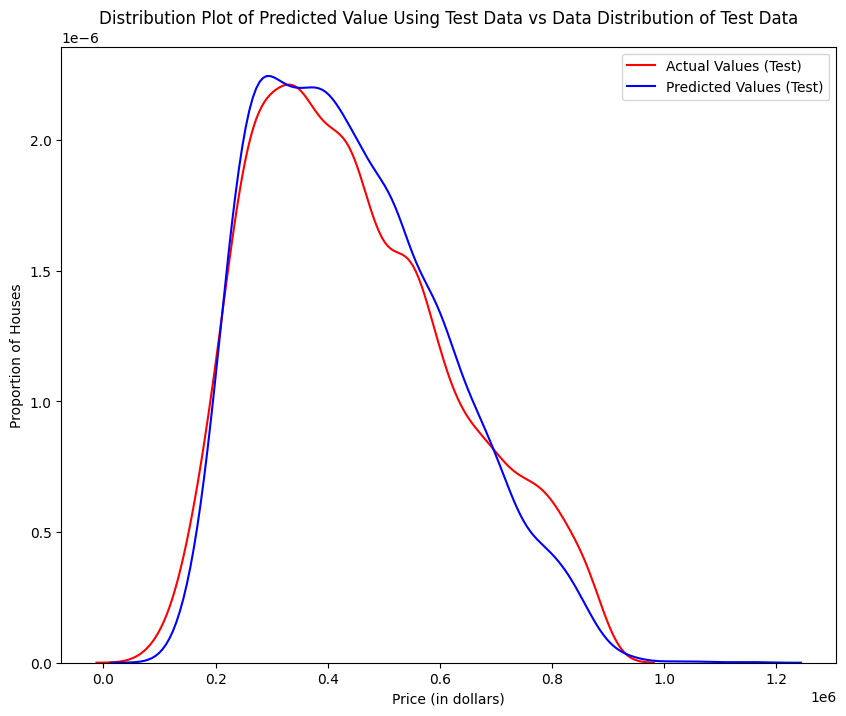

In [91]:
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_true,y_pred,"Actual Values (Test)","Predicted Values (Test)",Title)

### Feature importance and diagnostics

In [93]:
from tabulate import tabulate  

ridge_model = best_model.named_steps['ridge']
poly_transformer = best_model.named_steps['preprocessor'].named_transformers_['num'].named_steps['poly']

# Select only the numeric columns from X_train (used in PolynomialFeatures)
numeric_X_train = X_train[numeric_columns]

# Generate the new feature names from PolynomialFeatures
poly_feature_names = poly_transformer.get_feature_names_out(input_features=numeric_columns)

# Combine polynomial feature names with boolean column names
feature_names = np.concatenate([poly_feature_names, bool_columns])

print('Total Features:', len(feature_names))

# Get coefficients from the Ridge model
coefficients = ridge_model.coef_

# Validate the length of the feature names and coefficients
if len(coefficients) != len(feature_names):
    raise ValueError("Mismatch between combined feature names and model coefficients.")

coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()

# Sort by absolute value of the coefficient in descending order
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

print(tabulate(coeff_df[['Feature', 'Coefficient']], headers=["Feature", "Coefficient"], tablefmt="grid"))

# Save the results to a CSV file
# Uncomment the lines below if saving is required
# import pandas as pd
# coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
# coeff_df.to_csv("ridge_model_coefficients.csv", index=False)
# print("\nCoefficients saved to 'ridge_model_coefficients.csv'")



Total Features: 735
+-----+-----------------------------------------------------------------+---------------+
|     | Feature                                                         |   Coefficient |
+=====+=================================================================+===============+
|  31 | lat distance_to_center                                          |  -0.694859    |
+-----+-----------------------------------------------------------------+---------------+
| 239 | lat long distance_to_center                                     |   0.651851    |
+-----+-----------------------------------------------------------------+---------------+
|   1 | lat                                                             |   0.56315     |
+-----+-----------------------------------------------------------------+---------------+
| 148 | zipcode long distance_to_center                                 |  -0.388199    |
+-----+-----------------------------------------------------------------+-------

#### SHAP values

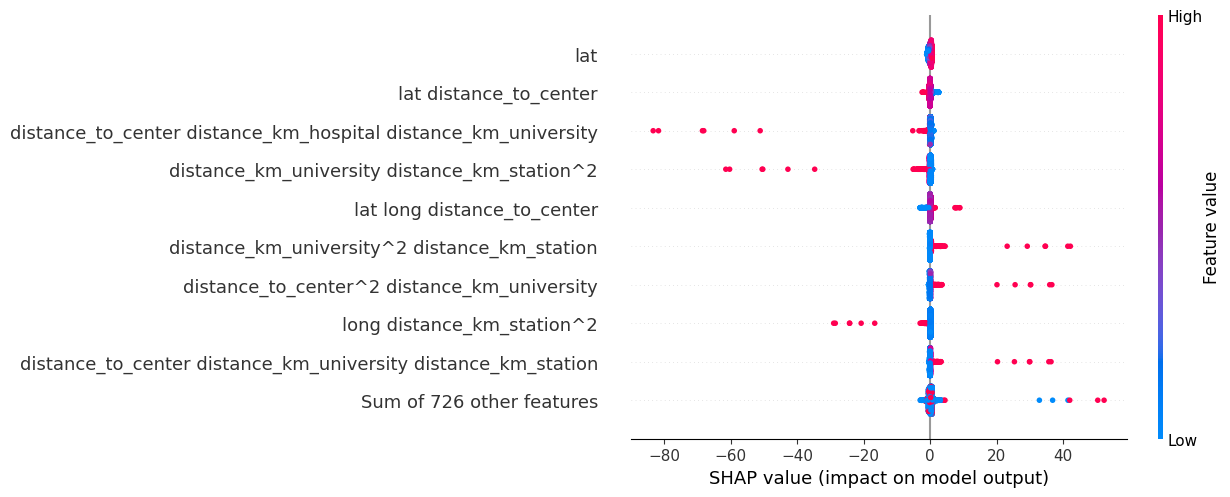

<Figure size 640x480 with 0 Axes>

In [95]:
import shap

# Extract components from the pipeline
ridge_model = best_model.named_steps['ridge']
poly_transformer = best_model.named_steps['preprocessor'].named_transformers_['num'].named_steps['poly']

X_test_transformed = best_model.named_steps['preprocessor'].transform(X_test)

poly_feature_names = poly_transformer.get_feature_names_out(input_features=numeric_columns)

feature_names = np.concatenate([poly_feature_names, bool_columns])

explainer = shap.LinearExplainer(ridge_model, X_test_transformed, feature_names=feature_names)

shap_values = explainer(X_test_transformed)

shap.plots.beeswarm(shap_values)

plt.savefig("shap_summary_plot.png", bbox_inches='tight')
plt.show()


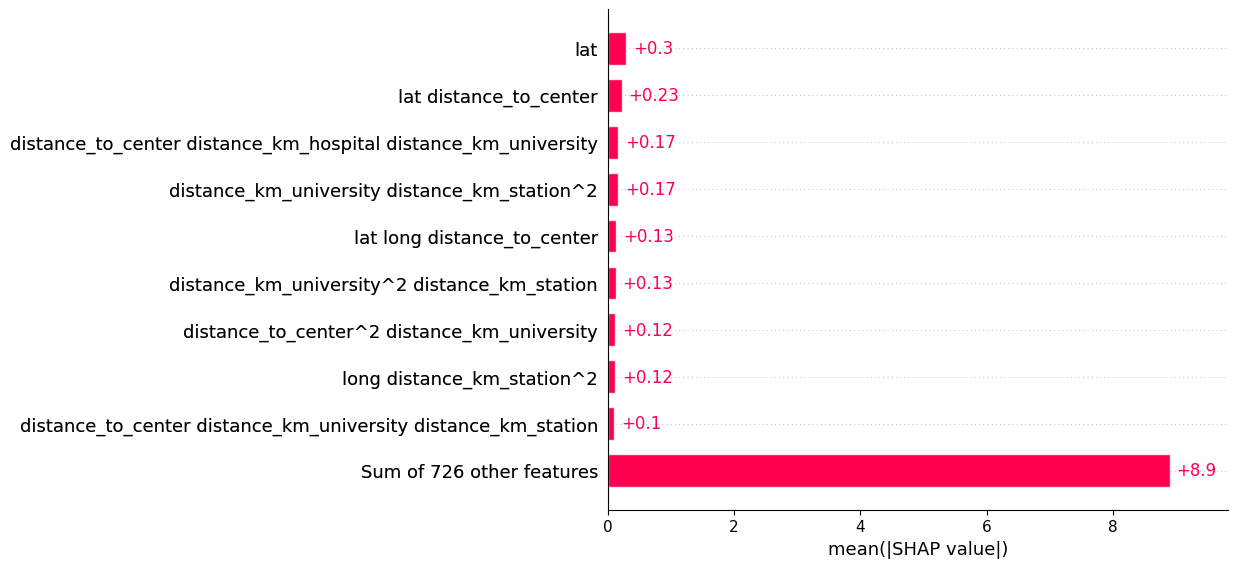

In [96]:
shap.plots.bar(shap_values)

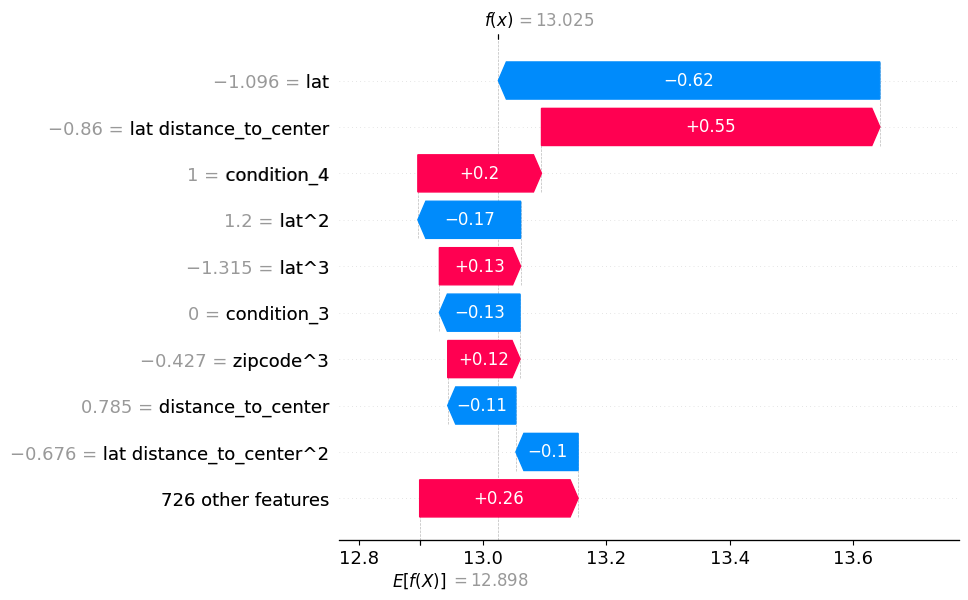

In [97]:
shap.plots.waterfall(shap_values[0])

Analyze residuals to check for biases in the predictions

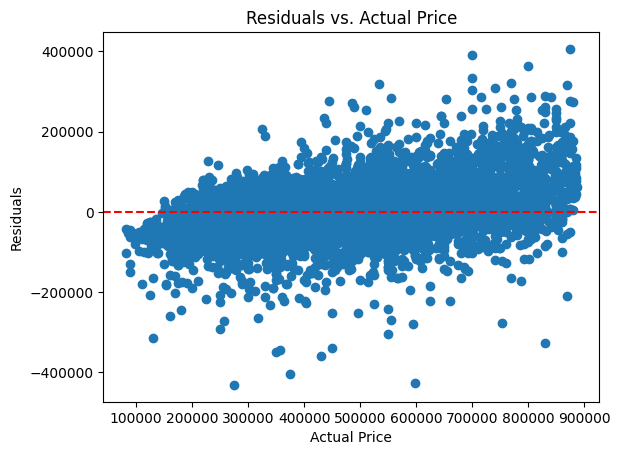

In [99]:

residuals = y_true - y_pred
plt.scatter(y_true, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Residuals")
plt.title("Residuals vs. Actual Price")
plt.savefig("residuals_plot.png", bbox_inches='tight') 
plt.show()


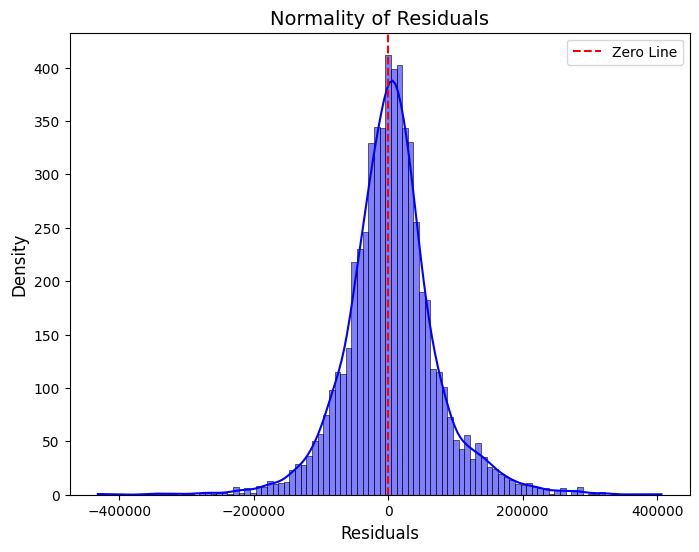

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.histplot(
    residuals, 
    kde=True, 
    color='blue', 
    bins=100
)

plt.title('Normality of Residuals', fontsize=14)
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.axvline(x=0, color='red', linestyle='--', label='Zero Line')
plt.legend()
plt.show()



In [101]:
index=residuals[residuals<-2500000].index
print(index)
print(y_true.loc[index])
# Convert the transformed data back to a DataFrame
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names, index=X_test.index)

X_test_transformed_df.loc[index]

Index([], dtype='int64', name='id')
Series([], Name: log_price, dtype: float64)


,zipcode,lat,long,house_age,distance_to_center,distance_km_hospital,distance_km_university,distance_km_station,sqft_lot_ratio,sqft_lot15_ratio,sqft_basement_ratio,log_sqft_living,log_sqft_living15,log_sqft_above,zipcode^2,zipcode lat,zipcode long,zipcode house_age,zipcode distance_to_center,zipcode distance_km_hospital,zipcode distance_km_university,zipcode distance_km_station,zipcode sqft_lot_ratio,zipcode sqft_lot15_ratio,zipcode sqft_basement_ratio,zipcode log_sqft_living,zipcode log_sqft_living15,zipcode log_sqft_above,lat^2,lat long,lat house_age,lat distance_to_center,lat distance_km_hospital,lat distance_km_university,lat distance_km_station,lat sqft_lot_ratio,lat sqft_lot15_ratio,lat sqft_basement_ratio,lat log_sqft_living,lat log_sqft_living15,lat log_sqft_above,long^2,long house_age,long distance_to_center,long distance_km_hospital,long distance_km_university,long distance_km_station,long sqft_lot_ratio,long sqft_lot15_ratio,long sqft_basement_ratio,long log_sqft_living,long log_sqft_living15,long log_sqft_above,house_age^2,house_age distance_to_center,house_age distance_km_hospital,house_age distance_km_university,house_age distance_km_station,house_age sqft_lot_ratio,house_age sqft_lot15_ratio,house_age sqft_basement_ratio,house_age log_sqft_living,house_age log_sqft_living15,house_age log_sqft_above,distance_to_center^2,distance_to_center distance_km_hospital,distance_to_center distance_km_university,distance_to_center distance_km_station,distance_to_center sqft_lot_ratio,distance_to_center sqft_lot15_ratio,distance_to_center sqft_basement_ratio,distance_to_center log_sqft_living,distance_to_center log_sqft_living15,distance_to_center log_sqft_above,distance_km_hospital^2,distance_km_hospital distance_km_university,distance_km_hospital distance_km_station,distance_km_hospital sqft_lot_ratio,distance_km_hospital sqft_lot15_ratio,distance_km_hospital sqft_basement_ratio,distance_km_hospital log_sqft_living,distance_km_hospital log_sqft_living15,distance_km_hospital log_sqft_above,distance_km_university^2,distance_km_university distance_km_station,distance_km_university sqft_lot_ratio,distance_km_university sqft_lot15_ratio,distance_km_university sqft_basement_ratio,distance_km_university log_sqft_living,distance_km_university log_sqft_living15,distance_km_university log_sqft_above,distance_km_station^2,distance_km_station sqft_lot_ratio,distance_km_station sqft_lot15_ratio,distance_km_station sqft_basement_ratio,distance_km_station log_sqft_living,distance_km_station log_sqft_living15,distance_km_station log_sqft_above,sqft_lot_ratio^2,sqft_lot_ratio sqft_lot15_ratio,...,sqft_lot_ratio sqft_basement_ratio log_sqft_living,sqft_lot_ratio sqft_basement_ratio log_sqft_living15,sqft_lot_ratio sqft_basement_ratio log_sqft_above,sqft_lot_ratio log_sqft_living^2,sqft_lot_ratio log_sqft_living log_sqft_living15,sqft_lot_ratio log_sqft_living log_sqft_above,sqft_lot_ratio log_sqft_living15^2,sqft_lot_ratio log_sqft_living15 log_sqft_above,sqft_lot_ratio log_sqft_above^2,sqft_lot15_ratio^3,sqft_lot15_ratio^2 sqft_basement_ratio,sqft_lot15_ratio^2 log_sqft_living,sqft_lot15_ratio^2 log_sqft_living15,sqft_lot15_ratio^2 log_sqft_above,sqft_lot15_ratio sqft_basement_ratio^2,sqft_lot15_ratio sqft_basement_ratio log_sqft_living,sqft_lot15_ratio sqft_basement_ratio log_sqft_living15,sqft_lot15_ratio sqft_basement_ratio log_sqft_above,sqft_lot15_ratio log_sqft_living^2,sqft_lot15_ratio log_sqft_living log_sqft_living15,sqft_lot15_ratio log_sqft_living log_sqft_above,sqft_lot15_ratio log_sqft_living15^2,sqft_lot15_ratio log_sqft_living15 log_sqft_above,sqft_lot15_ratio log_sqft_above^2,sqft_basement_ratio^3,sqft_basement_ratio^2 log_sqft_living,sqft_basement_ratio^2 log_sqft_living15,sqft_basement_ratio^2 log_sqft_above,sqft_basement_ratio log_sqft_living^2,sqft_basement_ratio log_sqft_living log_sqft_living15,sqft_basement_ratio log_sqft_living log_sqft_above,sqft_basement_ratio log_sqft_living15^2,sqft_basement_ratio log_sqft_living1

#### Insights:
Residuals seem to be randomly distributed around 0.

In [103]:
print(y_test.head())
X_test.head()

id
3914000090    13.202098
9264910300    12.751300
2538400060    13.664688
9839300875    13.592367
4083800345    13.337475
Name: log_price, dtype: float64


,waterfront,zipcode,lat,long,house_age,distance_to_center,distance_km_hospital,distance_km_university,distance_km_station,sqft_lot_ratio,sqft_lot15_ratio,sqft_basement_ratio,log_sqft_living,log_sqft_living15,log_sqft_above,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bathrooms_1,bathrooms_2,bathrooms_3,bathrooms_4,bathrooms_5,bathrooms_6,bathrooms_7,floors_2,floors_3,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,yr_renovated_binned_2,yr_renovated_binned_3,yr_renovated_binned_4,yr_renovated_binned_5,yr_renovated_binned_6,yr_renovated_binned_7,yr_renovated_binned_8,month_house_sold_1146,month_house_sold_1279,month_house_sold_1334,month_house_sold_1626,month_house_sold_1677,month_house_sold_1689,month_house_sold_1747,month_house_sold_1938,month_house_sold_1971,month_house_sold_1988,month_house_sold_2165,geo_cluster_1,geo_cluster_2,geo_cluster_3
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3914000090,False,98001,47.3121,-122.253,55,26.320102,1.861244,1.753862,3.952431,0.960115,0.918402,0.000000,7.749322,7.783224,7.749322,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
9264910300,False,98023,47.3074,-122.337,29,27.975740,1.882848,2.172891,2.693801,0.731876,0.716837,0.125523,8.051978,7.859413,7.420579,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
2538400060,False,98075,47.5854,-122.080,9,12.015303,5.271165,4.445655,4.997315,0.639081,0.682743,0.000000,8.283999,8.210668,8.283999,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
9839300875,False,98122,47.6120,-122.292,108,8.479038,1.521670,1.612378,3.414403,0.721311,0.710884,0.000000,7.438384,7.383989,7.438384,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4083800345,False,98103,47.6649,-122.337,97,15.256290,2.804941,1.779674,6.942108,0.694669,0.667838,0.087237,7.544332,7.512071,7.207860,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False


In [104]:
# Extract row of Y and X
first_row_y = y_test.head(1)  
json_result_y = first_row_y.to_json(orient="records") 
print(json_result_y)

first_row_X = X_test.head(1)  
json_result_X = first_row_X.to_json(orient="records")  
print(json_result_X)

[13.2020983454]
[{"waterfront":false,"zipcode":98001,"lat":47.3121,"long":-122.253,"house_age":55,"distance_to_center":26.3201020314,"distance_km_hospital":1.8612435058,"distance_km_university":1.7538623483,"distance_km_station":3.9524309109,"sqft_lot_ratio":0.9601148417,"sqft_lot15_ratio":0.9184018008,"sqft_basement_ratio":0.0,"log_sqft_living":7.7493224647,"log_sqft_living15":7.7832240163,"log_sqft_above":7.7493224647,"bedrooms_1":false,"bedrooms_2":false,"bedrooms_3":true,"bedrooms_4":false,"bedrooms_5":false,"bedrooms_6":false,"bedrooms_7":false,"bathrooms_1":true,"bathrooms_2":false,"bathrooms_3":false,"bathrooms_4":false,"bathrooms_5":false,"bathrooms_6":false,"bathrooms_7":false,"floors_2":false,"floors_3":false,"view_1":false,"view_2":true,"view_3":false,"view_4":false,"condition_2":false,"condition_3":false,"condition_4":true,"condition_5":false,"grade_3":false,"grade_4":false,"grade_5":false,"grade_6":false,"grade_7":false,"grade_8":true,"grade_9":false,"grade_10":false,"grad

# Save the model

In [106]:
original_feature_names = X_train.columns  
list(original_feature_names)


['waterfront',
 'zipcode',
 'lat',
 'long',
 'house_age',
 'distance_to_center',
 'distance_km_hospital',
 'distance_km_university',
 'distance_km_station',
 'sqft_lot_ratio',
 'sqft_lot15_ratio',
 'sqft_basement_ratio',
 'log_sqft_living',
 'log_sqft_living15',
 'log_sqft_above',
 'bedrooms_1',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bathrooms_1',
 'bathrooms_2',
 'bathrooms_3',
 'bathrooms_4',
 'bathrooms_5',
 'bathrooms_6',
 'bathrooms_7',
 'floors_2',
 'floors_3',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'yr_renovated_binned_2',
 'yr_renovated_binned_3',
 'yr_renovated_binned_4',
 'yr_renovated_binned_5',
 'yr_renovated_binned_6',
 'yr_renovated_binned_7',
 'yr_renovated_binned_8',
 'month_house_sold_1146',
 'month_house_sold_1279',
 'month_ho

In [107]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_pipeline_model.pkl')


['best_pipeline_model.pkl']